<a href="https://colab.research.google.com/github/DuckQuack129/1/blob/main/%D0%92%D1%8B%D1%87%D0%B8_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Ячейка 1: Вычисления и Вывод Таблицы

import numpy as np
import pandas as pd

# Параметры задачи
pi = np.pi
a = 0.29  # Коэффициент переноса

# Диапазон для x и t
x_min, x_max = 0.0, 1.0
t_min, t_max = 0.0, 1.0

# Функция точного решения
def u_exact(x, t):
    return -(t - 0.3)**3 + np.cos(2*x) + 2*pi*t*x

# Граничные условия на x=0
def g_1(i, n):
    t = i / n
    return u_exact(0, t)

# Начальные условия при t=0
def w(j, m):
    x = j / m
    return u_exact(x, 0)

#  f(x, t)
def f_i_j(i, j, n, m):
    t = i / n
    x = j / m
    # Вычисляем производные аналитического решения
    du_dt = -3*(t - 0.3)**2 + 2*pi*x
    du_dx = -2*np.sin(2*x) + 2*pi*t
    return du_dt + a * du_dx

# Функция точного решения для проверки
def u_i_j(i, j, n, m):
    t = i / n
    x = j / m
    return u_exact(x, t)

# Диапазоны для m (количество пространственных узлов)
m_values = [10, 20, 40, 80, 160, 320]

# Инициализация списка для хранения результатов
results = []

# Обработка каждого значения m
for m in m_values:
    n = 10 * m  # Количество временных шагов
    h = 1.0 / m  # Шаг по пространству
    tau = 1.0 / n  # Шаг по времени

    # Создание сетки
    drrr = np.zeros((int(n) + 1, int(m) + 1))

    # Установка начальных условий при t=0
    for j in range(int(m) + 1):
        drrr[0][j] = w(j, m)

    # Установка граничных условий на x=0 для всех временных шагов
    for i in range(int(n) + 1):
        drrr[i][0] = g_1(i, n)

    # Временной цикл
    for i_step in range(int(n)):
        for j_step in range(1, int(m) + 1):
            # Вычисление правой части схемы
            f_val = f_i_j(i_step + 1, j_step, n, m)
            drrr[i_step + 1][j_step] = (f_val * tau * h) + (h * drrr[i_step][j_step]) + (a * tau * drrr[i_step + 1][j_step - 1])
            drrr[i_step + 1][j_step] /= (h + a * tau)

    # Вычисление точного решения в конечный момент времени
    U_exact_final = np.zeros(int(m) + 1)
    for j_step in range(int(m) + 1):
        U_exact_final[j_step] = u_i_j(int(n), j_step, n, m)

    # Вычисление погрешности (максимальная абсолютная ошибка)
    error = np.max(np.abs(drrr[int(n), :] - U_exact_final))

    # Добавление результатов в список
    results.append({
        'M': m,
        'h': f"{h:.5f}",
        'N': int(n),
        'tau': f"{tau:.5f}",
        'Error': f"{error:.5f}"
    })

# Создание DataFrame для отображения результатов
df = pd.DataFrame(results)

# Переупорядочивание колонок для удобства
df = df[['M', 'h', 'N', 'tau', 'Error']]

# Вывод таблицы
print("Таблица зависимости шага по пространству h, шага по времени tau и погрешности:")
df

Таблица зависимости шага по пространству h, шага по времени tau и погрешности:


,M,h,N,tau,Error
0,10,0.10000,100,0.01000,0.05066
1,20,0.05000,200,0.00500,0.02686
2,40,0.02500,400,0.00250,0.01401
3,80,0.01250,800,0.00125,0.00719
4,160,0.00625,1600,0.00063,0.00366
5,320,0.00313,3200,0.00031,0.00185


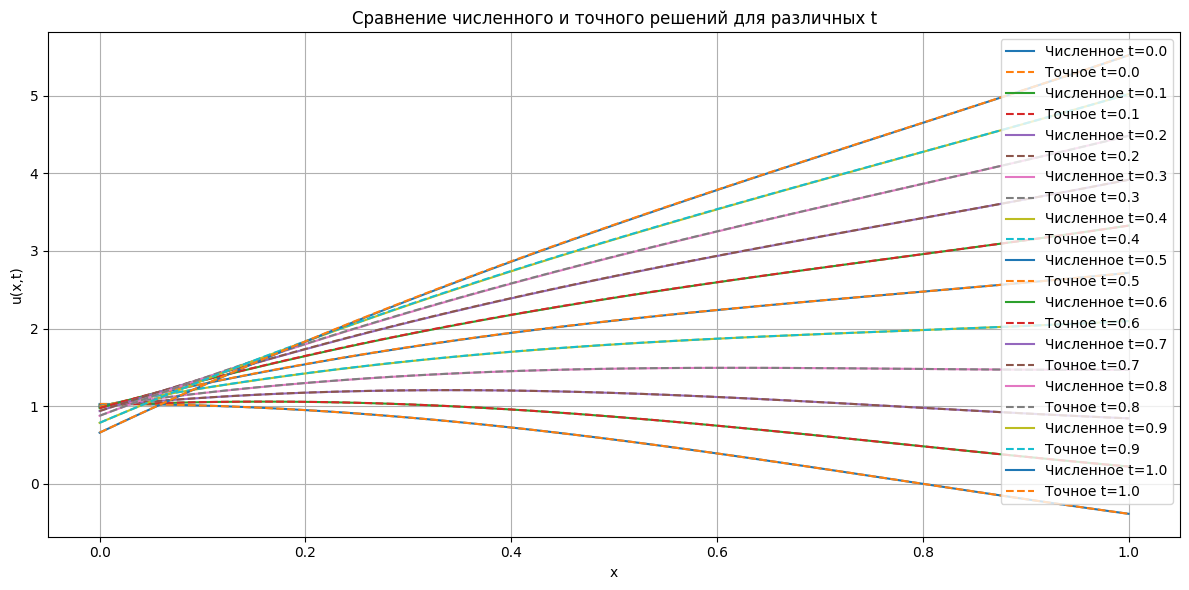

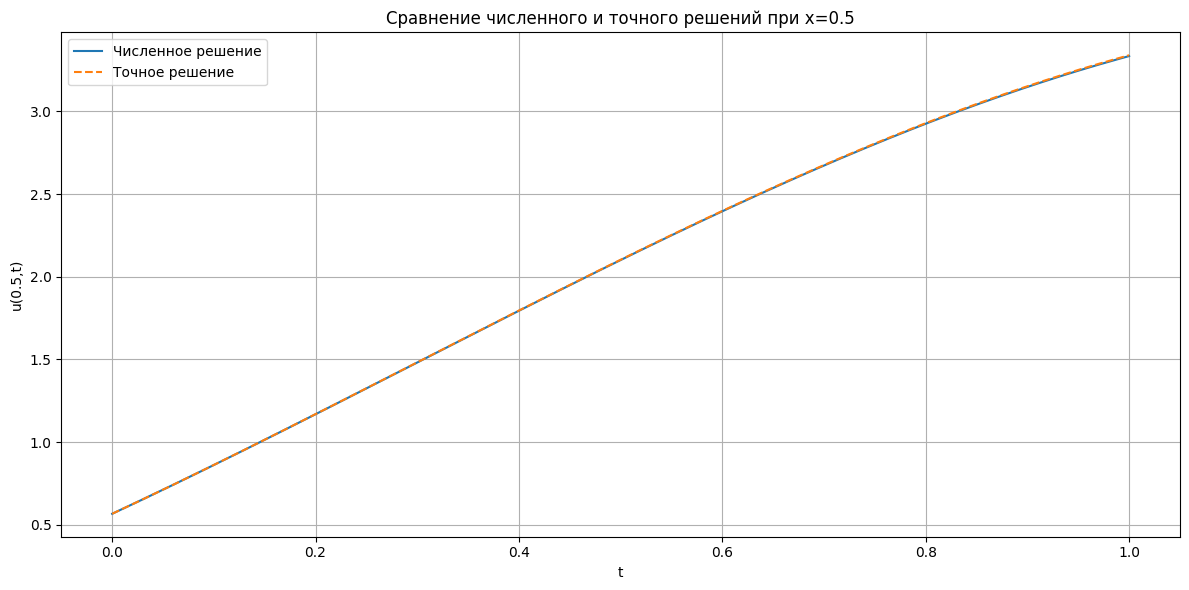

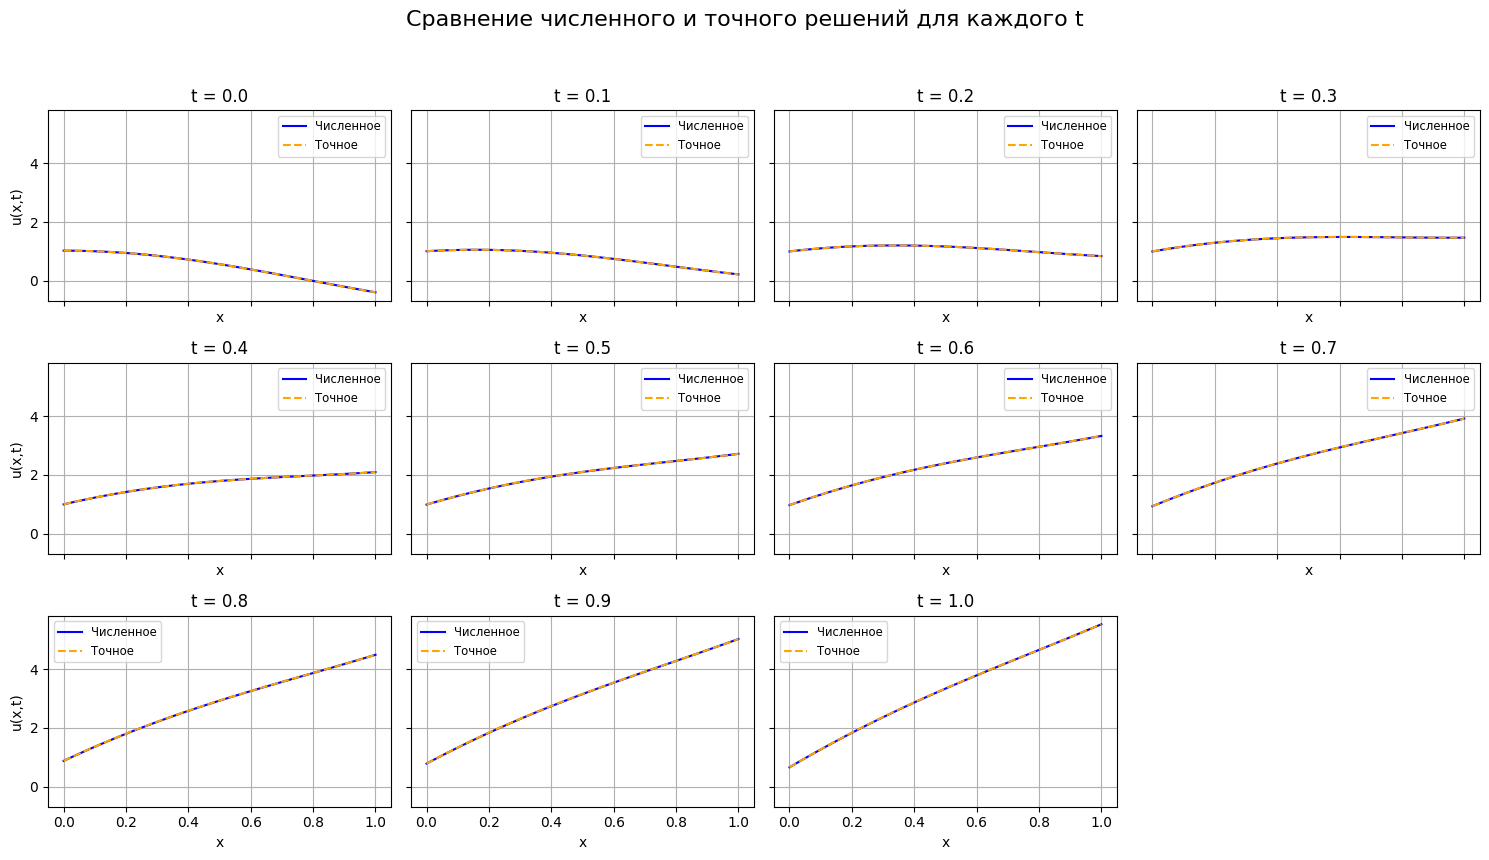

Максимальная погрешность для M=100: 5.79e-03


In [15]:
# Ячейка 2: Построение и Вывод Графиков

import matplotlib.pyplot as plt

# Убедимся, что данные для m_plot уже рассчитаны и хранятся в drrr_plot и U_exact_plot

# 1. Графики для t от 0 до 1 с шагом 0.1
time_steps = np.linspace(t_min, t_max, 11)  # t=0,0.1,...,1.0
indices_time = [int(ts / tau_plot) for ts in time_steps]

plt.figure(figsize=(12, 6))
for n_step in indices_time:
    plt.plot(x_plot, drrr_plot[n_step, :], label=f'Численное t={t_plot[n_step]:.1f}')
    plt.plot(x_plot, U_exact_plot[n_step, :], '--', label=f'Точное t={t_plot[n_step]:.1f}')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('Сравнение численного и точного решений для различных t')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. График для x = 0.5
x_fixed = 0.5
j_mid = np.argmin(np.abs(x_plot - x_fixed))  # индекс ближайшего x к 0.5

plt.figure(figsize=(12, 6))
plt.plot(t_plot, drrr_plot[:, j_mid], label='Численное решение')
plt.plot(t_plot, U_exact_plot[:, j_mid], '--', label='Точное решение')
plt.xlabel('t')
plt.ylabel('u(0.5,t)')
plt.title('Сравнение численного и точного решений при x=0.5')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Отдельные графики для каждой пары численное t и точное t

# Определим количество графиков
num_plots = len(time_steps)
cols = 4  # количество столбцов в сетке
rows = int(np.ceil(num_plots / cols))

fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows), sharex=True, sharey=True)

for idx, n_step in enumerate(indices_time):
    row = idx // cols
    col = idx % cols
    ax = axes[row, col] if rows > 1 else axes[col]

    ax.plot(x_plot, drrr_plot[n_step, :], label='Численное', color='blue')
    ax.plot(x_plot, U_exact_plot[n_step, :], '--', label='Точное', color='orange')
    ax.set_title(f't = {t_plot[n_step]:.1f}')
    ax.set_xlabel('x')
    if col == 0:
        ax.set_ylabel('u(x,t)')
    ax.legend(fontsize='small')
    ax.grid(True)

# Удалим пустые субплоты, если есть
for idx in range(num_plots, rows * cols):
    row = idx // cols
    col = idx % cols
    fig.delaxes(axes[row, col] if rows > 1 else axes[col])

plt.suptitle('Сравнение численного и точного решений для каждого t', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Дополнительно: Максимальная погрешность для m_plot
print(f"Максимальная погрешность для M={m_plot}: {error_plot:.2e}")